In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv("C:/Users/kaush/Downloads/Reviews.csv")
print(df.shape)
df = df.head(2000)
print(df.shape)

(568454, 10)
(2000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Quick EDA

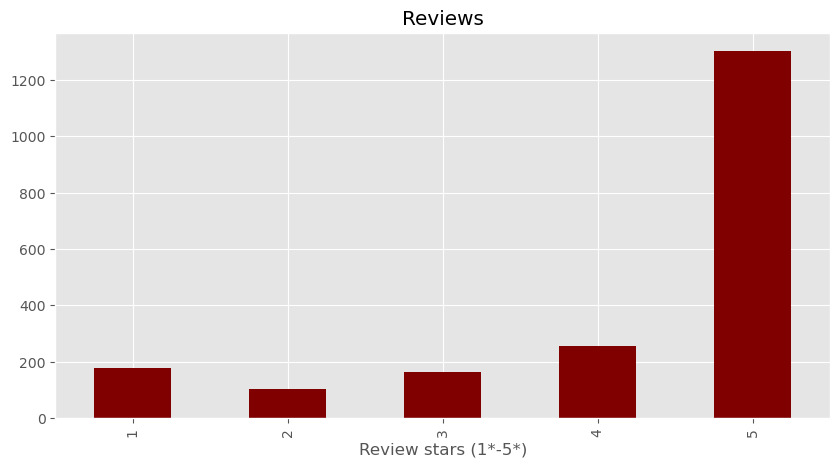

In [5]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Reviews', color ='maroon', figsize = (10, 5)) 
ax.set_xlabel('Review stars (1*-5*)')
plt.show()

###  Basic NLTK

In [6]:
review = df.Text[58]
print(review)

Great product, nice combination of chocolates and perfect size!  The bags had plenty, and they were shipped promptly.  The kids in the neighborhood liked our candies!


In [7]:
nltk.download('punkt')
tokens = nltk.word_tokenize(review)
tokens[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Great',
 'product',
 ',',
 'nice',
 'combination',
 'of',
 'chocolates',
 'and',
 'perfect',
 'size']

In [8]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Great', 'NNP'),
 ('product', 'NN'),
 (',', ','),
 ('nice', 'JJ'),
 ('combination', 'NN'),
 ('of', 'IN'),
 ('chocolates', 'NNS'),
 ('and', 'CC'),
 ('perfect', 'JJ'),
 ('size', 'NN')]

In [9]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (GPE Great/NNP)
  product/NN
  ,/,
  nice/JJ
  combination/NN
  of/IN
  chocolates/NNS
  and/CC
  perfect/JJ
  size/NN
  !/.
  The/DT
  bags/NNS
  had/VBD
  plenty/NN
  ,/,
  and/CC
  they/PRP
  were/VBD
  shipped/VBN
  promptly/RB
  ./.
  The/DT
  kids/NNS
  in/IN
  the/DT
  neighborhood/NN
  liked/VBD
  our/PRP$
  candies/NNS
  !/.)


## Vader Sentiment Scoring

In [10]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

model = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kaush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
model.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
model.polarity_scores('Worst product.')

{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249}

In [13]:
model.polarity_scores(review)

{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.9323}

In [14]:
#Run the polarity score on the entire dataset
result = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = model.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [15]:
# Merging result with the original dataframe
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [16]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

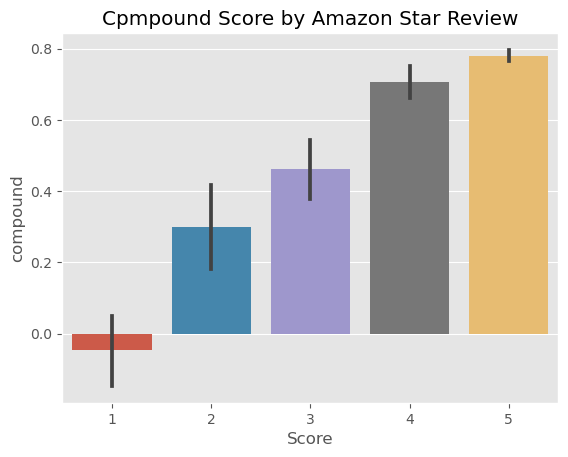

In [17]:
graph = sns.barplot(data = vaders, x = 'Score' , y = 'compound')
graph.set_title('Cpmpound Score by Amazon Star Review')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

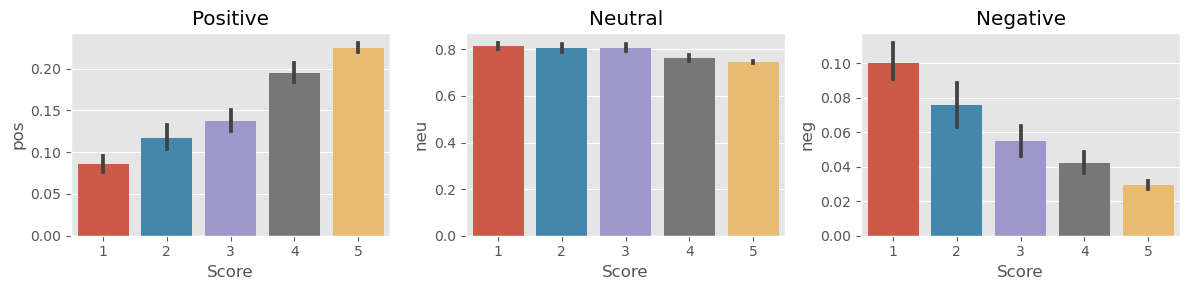

In [18]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data = vaders, x='Score' , y='pos', ax = axs[0])
sns.barplot(data = vaders, x='Score' , y='neu', ax = axs[1])
sns.barplot(data = vaders, x='Score' , y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show